### Importing Modules

In [77]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.simplefilter("ignore")

## Exploratory Data Analysis

In [78]:
df = pd.read_csv("Language Identify.csv")

In [79]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [80]:
df.sample(15)

,Text,Language
4140,je ne suis pas sûr d'être d'accord.,French
7834,"Bilgiler tartışılır, değerlendirilir ve içeriğ...",Turkish
353,"[80] In 2010, Daniel Tosh encouraged viewers o...",English
106,Other lakes are found in endorheic basins or a...,English
2039,क्या आप मुझे एक सवारी घर देना चाहेंगे?,Hindi
5293,Quiero recordarte que en caso de que estés bus...,Spanish
1196,i'm sorry.,English
2896,digamos que você tenha muitas tarefas e um tes...,Portugeese
6606,бесконечно благодарен.,Russian
1,"""Nature"" can refer to the phenomena of the phy...",English


In [81]:
df["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

Data set contains text details for 17 different languages.

### Missing Value Detection

In [82]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [91]:
df.duplicated().value_counts()

False    10271
True        66
dtype: int64

This data set is small data set. I will not drop duplicated value.

## Split Data as Train and Test set

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:Here, Dataset is broken into two parts in ratio of 80:20. It means 80% data will used for model training and 20% for model testing.

In [121]:
X = df["Text"]
y = df["Language"]

I separate the dependent and independent variables as X and y.

### Label Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. Language column's value can be represented as numerical.

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### Text Preprocessing
I found this data set in Kaggle. It contains many unwanted symbols, so I should use text preprocessing techniques.

In [123]:
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

### Vectorization

In the next step we create a numerical feature vector for each document:

In [124]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [87]:
X.shape

(10337, 39404)

In [125]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 42)

## Model Building

The model is trained with x _train, y_train data sets.

In [89]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [92]:
y_pred = model.predict(x_test)

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)


In [111]:
print("Accuracy of Model :",ac)

Accuracy of Model : 0.9763056092843327


In [95]:
# classification report
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       107
           1       1.00      0.98      0.99        86
           2       1.00      0.97      0.99       109
           3       0.88      0.99      0.93       277
           4       0.99      0.99      0.99       203
           5       1.00      0.98      0.99        94
           6       1.00      0.97      0.99        73
           7       1.00      1.00      1.00        12
           8       1.00      0.98      0.99       140
           9       1.00      0.95      0.97        74
          10       0.98      0.99      0.98       119
          11       1.00      0.98      0.99       148
          12       1.00      0.96      0.98       138
          13       0.97      0.99      0.98       164
          14       0.99      0.98      0.99       135
          15       1.00      0.98      0.99        94
          16       1.00      0.92      0.96        95

    accuracy              

### Confusion Matrix & Yellow Blick 

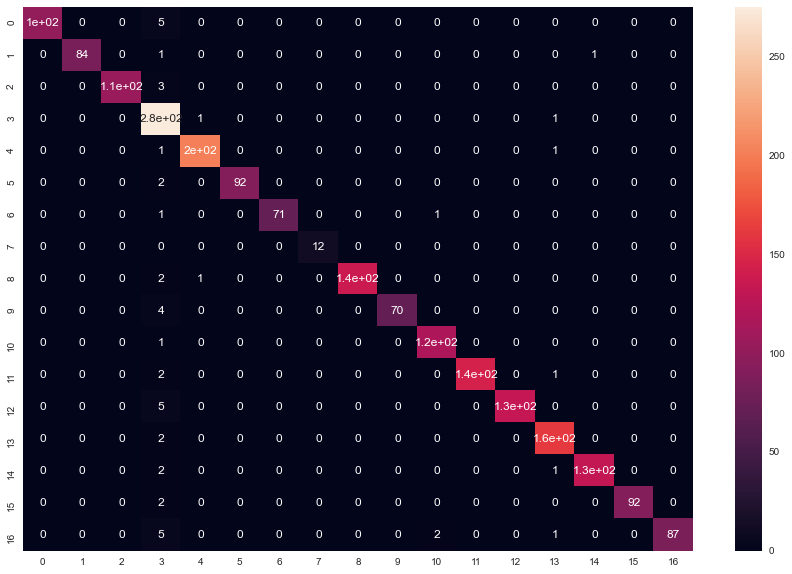

In [101]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

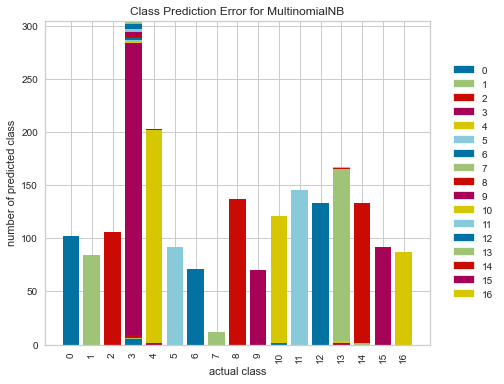

In [99]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(model)

# Fit the training data to the visualizer
visualizer.fit(x_train, y_train)

# Evaluate the model on the test data
visualizer.score(x_test, y_test)

# Draw visualization
visualizer.poof();

This grahpic shows us prediction error. Model finds texts of 0,1 ve 2 languages as %100 accuracy. There are 38 errors for 300 texts of 3 language.

### Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [113]:
logmodel_count = LogisticRegression(C = 10)
logmodel_count.fit(x_train, y_train)

LogisticRegression(C=10)

In [114]:
y_pred = logmodel_count.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 95   0   0   0   0   0   0   0   0  12   0   0   0   0   0   0   0]
 [  0  80   0   0   0   0   0   0   0   3   0   0   0   1   2   0   0]
 [  0   1 105   0   0   0   0   0   0   2   0   0   0   0   1   0   0]
 [  0   0   0 272   0   0   0   0   1   3   0   0   0   1   0   0   0]
 [  0   0   0   1 196   0   0   0   0   4   0   1   0   1   0   0   0]
 [  0   0   0   0   0  90   0   0   0   3   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0  67   0   0   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  12   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0 133   5   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0  74   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2 117   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0 141   0   4   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7   0   0 131   0   0   0   0]
 [  0   0   0   1   0   0   0   0   3   3   0   0   0 157   0   0   0]
 [  0 

Accuracy for Logistic Regression model is 0.95.

### Support Vector Machine (SVM)

In [115]:
from sklearn.svm import LinearSVC

In [116]:
svm_count = LinearSVC(C=10).fit(x_train, y_train)
y_pred = svm_count.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 95   0   0   0   0   0   0   0   0  12   0   0   0   0   0   0   0]
 [  0  80   0   0   0   0   0   0   0   3   0   1   0   0   2   0   0]
 [  0   1 105   0   0   0   0   0   0   2   0   0   0   0   1   0   0]
 [  0   0   0 270   0   0   0   0   1   4   0   0   0   1   1   0   0]
 [  0   0   1   2 194   0   0   0   0   4   0   1   0   1   0   0   0]
 [  0   0   0   0   0  91   0   0   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  67   0   0   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  12   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0 133   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  74   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 115   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0 142   0   3   0   0   0]
 [  0   0   0   0   0   0   0   0   0  10   0   0 128   0   0   0   0]
 [  0   0   0   1   1   0   0   0   3   3   0   0   0 156   0   0   0]
 [  0 

Accuracy for Support Vector Machine model is 0.95.

### Random Forest 

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
rf_count = RandomForestClassifier(300, n_jobs = -1, min_samples_split =3, random_state = 42).fit(x_train, y_train)
y_pred = rf_count.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 94   0   0   0   0   0   0   0   0  13   0   0   0   0   0   0   0]
 [  0  81   0   0   1   0   0   0   0   3   0   0   0   0   1   0   0]
 [  0   0 105   0   0   0   0   0   0   2   0   0   0   1   1   0   0]
 [  0   0   0 269   0   0   0   0   1   4   0   0   0   3   0   0   0]
 [  0   0   0   2 192   0   0   0   0   6   0   1   0   2   0   0   0]
 [  0   0   0   0   0  90   0   0   0   3   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0  66   0   0   7   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  12   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 127   8   0   0   0   4   0   0   1]
 [  0   0   0   0   0   0   0   0   0  74   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   6 113   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   4   0 140   0   3   0   0   0]
 [  0   0   0   0   0   0   0   0   0  14   0   0 124   0   0   0   0]
 [  0   0   0   1   2   0   0   0   4   5   0   1   0 151   0   0   0]
 [  0 

Accuracy for Random Forest model is 0.93.

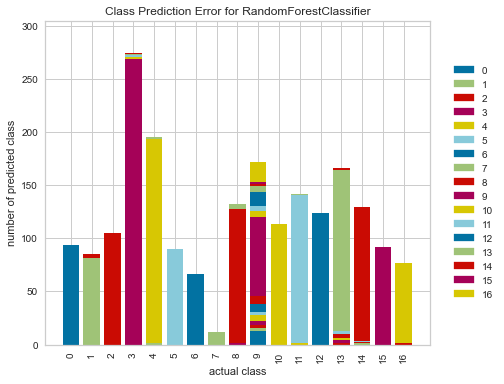

In [130]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(rf_count)

# Fit the training data to the visualizer
visualizer.fit(x_train, y_train)

# Evaluate the model on the test data
visualizer.score(x_test, y_test)

# Draw visualization
visualizer.poof();

## Conclusion

This assignment was aimed to implement a method to identify the language. I started with Exploratory Data Analysis and split data as train and test set. After I used Label Encoding to represent categorical columns in a numerical column. Following I used bag of words model to convert the text into numerical feature vectors. Finally I started training Navie Bayes, Logistic Regression, Support vector Machine and Random Forest models for classification problem and I got the best accuracy of 0.976 for Navie Bayes.